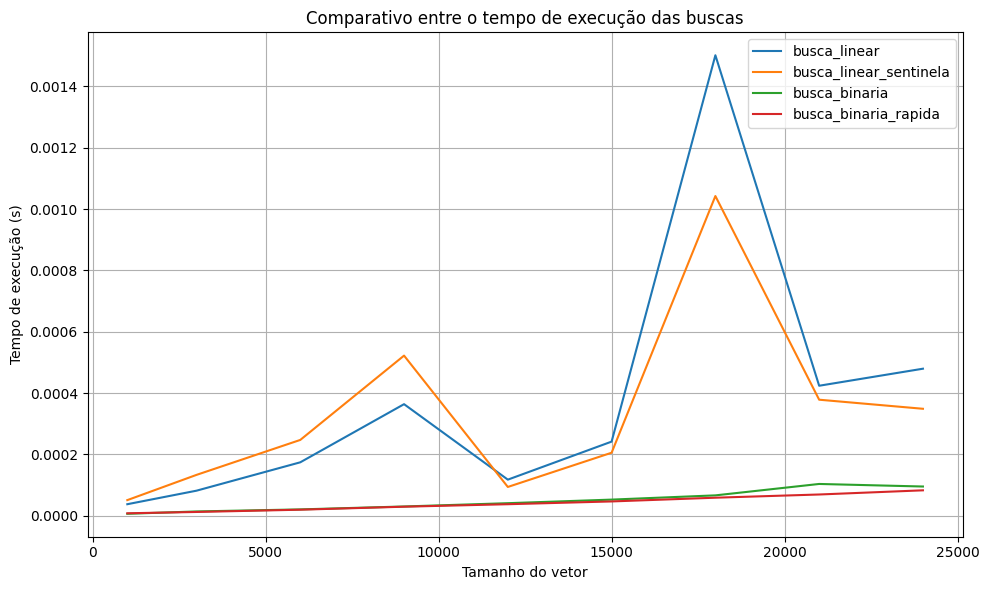

In [ ]:
import matplotlib.pyplot as plt
import random
import time

# Busca Linear Convencional
def busca_linear(vetor, chave):
    for i, valor in enumerate(vetor):
        if valor == chave:
            return i
    return -1

# Busca Linear com Sentinela
def busca_linear_sentinela(vetor, chave):
    n = len(vetor)
    vetor.append(chave)
    i = 0
    while vetor[i] != chave:
        i += 1
    vetor.pop()  # remove a sentinela
    return i if i < n else -1

# Busca Binária Convencional
def busca_binaria(vetor, chave):
    inicio, fim = 0, len(vetor) - 1
    while inicio <= fim:
        meio = (inicio + fim) // 2
        if vetor[meio] == chave:
            return meio
        elif vetor[meio] < chave:
            inicio = meio + 1
        else:
            fim = meio - 1
    return -1

# Busca Binária Rápida (versão recursiva)
def busca_binaria_rapida(vetor, chave, inicio=0, fim=None):
    if fim is None:
        fim = len(vetor) - 1
    if inicio > fim:
        return -1
    meio = (inicio + fim) // 2
    if vetor[meio] == chave:
        return meio
    elif vetor[meio] < chave:
        return busca_binaria_rapida(vetor, chave, meio + 1, fim)
    else:
        return busca_binaria_rapida(vetor, chave, inicio, meio - 1)

# Função para medir o tempo de execução de cada algoritmo
def medir_tempo(funcao, vetor, chave):
    inicio = time.time()
    funcao(vetor.copy(), chave)
    fim = time.time()
    return fim - inicio

# Tamanhos dos vetores
tamanhos = [1000, 3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000]

# Dicionário para armazenar os tempos
tempos = {
    "busca_linear": [],
    "busca_linear_sentinela": [],
    "busca_binaria": [],
    "busca_binaria_rapida": []
}

# Executa os testes
for tamanho in tamanhos:
    vetor = [random.randint(1, 1000000) for _ in range(tamanho)]
    chave = random.choice(vetor)  # elemento garantido existente

    # Para busca binária, é necessário ordenar
    vetor_ordenado = sorted(vetor)

    tempos["busca_linear"].append(medir_tempo(busca_linear, vetor, chave))
    tempos["busca_linear_sentinela"].append(medir_tempo(busca_linear_sentinela, vetor, chave))
    tempos["busca_binaria"].append(medir_tempo(busca_binaria, vetor_ordenado, chave))
    tempos["busca_binaria_rapida"].append(medir_tempo(busca_binaria_rapida, vetor_ordenado, chave))

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(tamanhos, tempos["busca_linear"], label="busca_linear")
plt.plot(tamanhos, tempos["busca_linear_sentinela"], label="busca_linear_sentinela")
plt.plot(tamanhos, tempos["busca_binaria"], label="busca_binaria")
plt.plot(tamanhos, tempos["busca_binaria_rapida"], label="busca_binaria_rapida")
plt.xlabel("Tamanho do vetor")
plt.ylabel("Tempo de execução (s)")
plt.title("Comparativo entre o tempo de execução das buscas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
